<a href="https://colab.research.google.com/github/samuelgbenga/ML-Logistic-regression-algorithm-challenge/blob/master/Assingment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries


In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

data = pd.read_csv("data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


split data into training data and test data

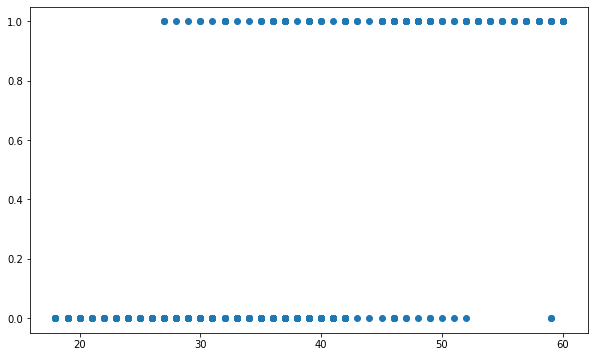

In [0]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()


# Divide the data training set and test set
x_train, x_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size = 0.20)

In [0]:
# Create the logistic regression model
#  i applied gradient descent algorithm with cost function a.k.a loss function.
# Helper function to normalize data
def normalize(X):
  return X - X.mean()

# method to make prediction
def predict(x, b0, b1):
  return np.array([1 / (1 + exp(-1 * b0 + -1 * b1 * x)) for x in x])

# method to train the model
def logistic_regression(X, Y):

  X = normalize(X)

  b0 = 0
  b1 = 0
  L = 0.001
  epochs = 150

  for epochs in range(epochs):
    y_pred = predict(X, b0, b1)
    D_b0 = sum(y_pred - Y)
    D_b1 = sum((y_pred - Y) * X)
    b0 = b0 - ((L * D_b0)/ len(y_pred))
    b1 = b1 - ((L * D_b1)/ len(y_pred))

    return b0, b1


This is where the program calculate the accuracy and using the using the gradient descent algorithm the first code. Applying our trained model...

Accuracy = 0.725


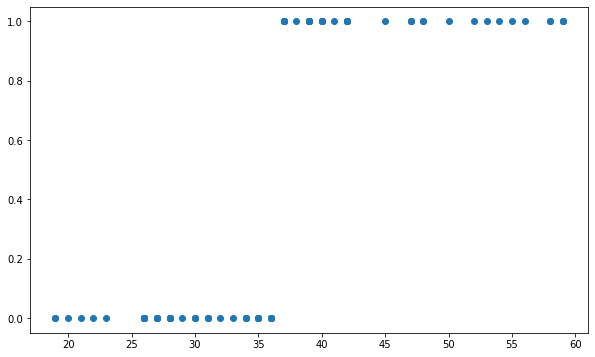

In [0]:
b0, b1 = logistic_regression(x_train, y_train)

X_test_norm = normalize(x_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
y_pred

plt.scatter(x_test, y_pred)

accuracy = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test.iloc[i]:
    accuracy += 1
print(f"Accuracy = {accuracy /len(y_pred)}")


Logistic regression function impleminting gradient ascent with maximum likelihood

In [0]:
# Create the logistic regression model
# i applied gradient ascent with MLE
# Helper function to normalize data
def normalize(X):
  return X - X.mean()

# method to make prediction
def predict(x, b0, b1):
  return np.array([1 / (1 + exp(-1 * b0 + -1 * b1 * x)) for x in x])

# method to train the model
def logistic_regression(X, Y):

  X = normalize(X)

  b0 = 0
  b1 = 0
  L = 0.001
  epochs = 150

  for epochs in range(epochs):
    y_pred = predict(X, b0, b1)
    D_b0 = sum(Y - y_pred)
    D_b1 = sum((Y - y_pred) * X)
    b0 = b0 + ((L * D_b0)/ len(y_pred))
    b1 = b1 + ((L * D_b1)/ len(y_pred))

    return b0, b1

This is where the program calculate the accuracy and using the using the gradient ascent algorithm the first code. Applying our trained model...

Accuracy = 0.725


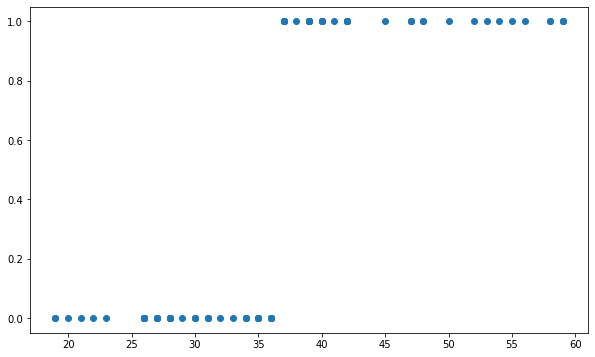

In [0]:
b0, b1 = logistic_regression(x_train, y_train)

X_test_norm = normalize(x_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
y_pred

plt.scatter(x_test, y_pred)

accuracy = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test.iloc[i]:
    accuracy += 1
print(f"Accuracy = {accuracy /len(y_pred)}")
